In [1]:
# -*- coding: utf-8 -*-
from sympy import *
from IPython.core.display import display
init_printing()

VMR, IR, dphiR = symbols('V_MR I_R \dot{\phi}_R')
VML, IL, dphiL = symbols('V_ML I_L \dot{\phi}_L')
R, KE = symbols('R K_E')
eq1_R = Eq(VMR, R*IR + KE*dphiR)
eq1_L = Eq(VML, R*IL + KE*dphiL)

print('モーターの回路方程式')
IR = solve(eq1_R, IR)[0]
IL = solve(eq1_L, IL)[0]
# eq1_L = Eq(IL, solve(eq1_L, IL)[0])

print('IR= ')
display(IR)
print('IL= ')
display(IL)

モーターの回路方程式
IR= 


IL= 


In [2]:
tau_R, tau_L = symbols('tau_R tau_L')
KT = symbols('K_T')

# eq2_R = Eq(tau_R, KT*IR)
# eq2_L = Eq(tau_L, KT*IL)
tau_R = KT*IR
tau_L = KT*IL
print('電流-トルクの関係式')
display(tau_R)
display(tau_L)

電流-トルクの関係式


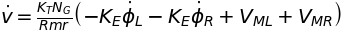

In [3]:
m, v, x, dotv, dotx = symbols('m v x \dot{v} \dot{x}')
FR, FL  = symbols('F_R F_L')
r, Ng = symbols('r N_{G}')
FR = Ng*tau_R/r
FL = Ng*tau_L/r

eq3_v = Eq(dotv, (FR+FL)/m); 
eq3_x = Eq(v, dphiR*r/Ng+dphiL*r/Ng );
# eq3_vx = Eq(dotx, v)

display(simplify(eq3_v), eq3_x)

ここで式を簡単にするために，
$$ \dot{\phi}:= \dot{\phi}_R + \dot{\phi}_L $$
$$ V_m := V_R + V_L$$
と定義する．すると，

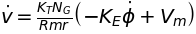

In [4]:
phi, dphi, Vm = var('\phi \dot{\phi} V_m')

eq4_v = Eq(dotv, (KT*Ng)/(R*m*r)*(-KE*dphi+ Vm))
eq4_phi = Eq(v, dphi*r/Ng)
eq4_x = Eq(dotx, v)

display(eq4_v, eq4_phi, eq4_x)

#### この式を $\dot{x},\dot{v},\dot{phi}$について整理してみます．すると次のような状態方程式が得られます．

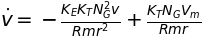

In [5]:
sols = solve([eq4_v, eq4_phi, eq4_x], [dotv, dphi, dotx])

eq_sol_v = Eq(dotv, sols[dotv])
eq_sol_phi = Eq(dphi, sols[dphi])
eq_sol_x = Eq(dotx, sols[dotx])

display(eq_sol_x, expand(eq_sol_v),eq_sol_phi)

In [6]:
a = -(KT*KE*m)/(Ng*R*r)
b = (KT*m*r)/R
c = 1/(Ng*r)
A = Matrix([ [0,a,0], [0,a,0], [0,c,0]])
B = Matrix([0, b, 0])

display(A,B)

⎡   -K_E⋅K_T⋅m    ⎤
⎢0  ───────────  0⎥
⎢    N_{G}⋅R⋅r    ⎥
⎢                 ⎥
⎢   -K_E⋅K_T⋅m    ⎥
⎢0  ───────────  0⎥
⎢    N_{G}⋅R⋅r    ⎥
⎢                 ⎥
⎢        1        ⎥
⎢0    ───────    0⎥
⎣     N_{G}⋅r     ⎦

⎡   0   ⎤
⎢       ⎥
⎢K_T⋅m⋅r⎥
⎢───────⎥
⎢   R   ⎥
⎢       ⎥
⎣   0   ⎦

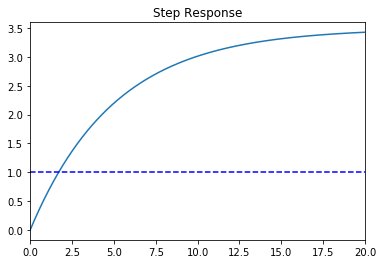

In [7]:
from control import *
import numpy as np
from matplotlib import pylab as plt
%matplotlib inline


# パラメータの設定
# 回路定数 (MK06-4.5の場合)
R = 5.0; # ohm
KE = 7.1504e-04; # 逆起電力定数[V/(rad/s)]
KT = 6.5e-04; # トルク定数[Nm/I]
Vbat = 4.0; # モータドライバの電源電圧[V]


# 機体パラメータ
Ng = 3.0;          # ギアの減速比(モーター：ホイール=1:n)
r = 7.5e-03;    # タイヤ半径[m]
m = 75e-03;     # 機体重量[kg]
w = 30e-03;     # 機体の中心から右端までの距離(横幅/2) [m]
h = 45e-03;     # 機体の中心から先端までの距離(縦幅/2) [m]
# J = 1/3*(w**2+h**2)*m; # 機体の慣性モーメント(形状を長方形に近似)

a = -(KT*KE*Ng**2)/(R*m*r**2)
b = (KT*Ng)/(m*r*R)
c = 1/(Ng*r)
A = np.array([ [0,1,0], [0,a,0], [0,c,0]])
B = np.array([[0], [b], [0]])
C = np.array([[0,1,0]])

# 状態空間形式(dX/dt = Ax + Bu, y = Cx)でシステムを表現
# sys = StateSpace(A, B, C, 0)
sys = StateSpace(A, B, C, 0)

t = np.linspace(0, 20, 1000)
yout, T = matlab.step(sys, t)


plt.plot(T, yout)
plt.axhline(1, color="b", linestyle="--");
plt.xlim(0, 20);
plt.title('Step Response'); # 日本語使えないつらい